# Convolution neural network

It is a special type of neural network which is used in the image processing and it gives a gives a better result during the image classification as compare to the artificial neural network(ANN). In this notebook I have used the cifar10 dataset to compare the performace of ANN and CNN in the image classification.

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train),(X_test, Y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0].shape

(32, 32, 3)

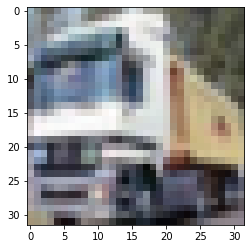

In [5]:
plt.imshow(X_train[1])

In [6]:
Y_train[1][0]

9

In [7]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# Normalizing the dataset

X_train = X_train/255
X_test = X_test/255

### Training of ANN network

In [9]:

model_ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)), # this layer fill flatten the 3D image into 1d array
    keras.layers.Dense(700, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model_ann.compile(
    optimizer='adam',
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [10]:
model_ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.8820 - accuracy: 0.3163
Epoch 2/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6853 - accuracy: 0.3900
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5912 - accuracy: 0.4289
Epoch 4/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5370 - accuracy: 0.4502
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5004 - accuracy: 0.4636


Text(0.5, 1.0, 'Graph for accuracy in ANN')

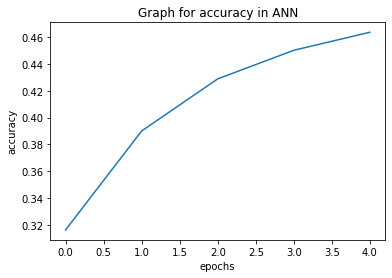

In [13]:
accur_ann = model_ann.history.history["accuracy"]

plt.plot(np.arange(len(accur_ann)), accur_ann)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Graph for accuracy in ANN")

In [15]:
lt = model_ann.predict(X_test)
prediction_ann = []

for i in lt:
    prediction_ann.append(i.argmax())

313/313 [==============================] - 2s 5ms/step


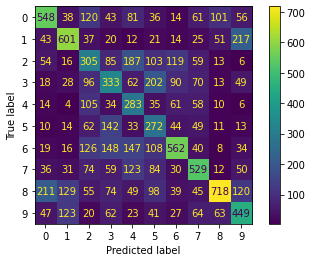

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

con_ann = confusion_matrix(prediction_ann, Y_test.ravel())
con_display_ann = ConfusionMatrixDisplay(con_ann)
con_display_ann.plot()

In [25]:
print(classification_report(prediction_ann, Y_test.ravel()))

              precision    recall  f1-score   support

           0       0.55      0.50      0.52      1098
           1       0.60      0.58      0.59      1041
           2       0.30      0.32      0.31       947
           3       0.33      0.35      0.34       961
           4       0.28      0.46      0.35       610
           5       0.27      0.42      0.33       650
           6       0.56      0.47      0.51      1208
           7       0.53      0.51      0.52      1028
           8       0.72      0.47      0.57      1538
           9       0.45      0.49      0.47       919

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.49      0.46      0.47     10000



### Convolution neural network training

In [26]:

model_cnn = keras.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=56, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(35, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model_cnn.compile(
    optimizer='adam',
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"],
    
)

In [27]:
model_cnn.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5334 - accuracy: 0.4448
Epoch 2/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1771 - accuracy: 0.5839
Epoch 3/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0425 - accuracy: 0.6359
Epoch 4/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9599 - accuracy: 0.6665
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9005 - accuracy: 0.6888


Text(0.5, 1.0, 'Graph for accuracy in CNN')

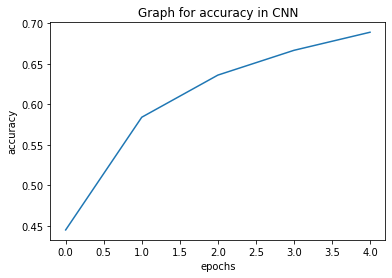

In [28]:
accur_cnn = model_cnn.history.history["accuracy"]

plt.plot(np.arange(len(accur_cnn)), accur_cnn)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Graph for accuracy in CNN")

In [29]:
lt = model_cnn.predict(X_test)
prediction_cnn = []

for i in lt:
    prediction_cnn.append(i.argmax())

313/313 [==============================] - 3s 8ms/step


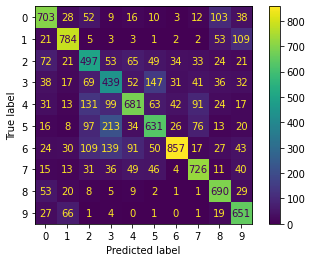

In [30]:
con_cnn = confusion_matrix(prediction_cnn, Y_test.ravel())
con_display_cnn = ConfusionMatrixDisplay(con_cnn)
con_display_cnn.plot()

In [31]:
print(classification_report(prediction_cnn, Y_test.ravel()))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       974
           1       0.78      0.80      0.79       983
           2       0.50      0.57      0.53       869
           3       0.44      0.49      0.46       902
           4       0.68      0.57      0.62      1192
           5       0.63      0.56      0.59      1134
           6       0.86      0.62      0.72      1387
           7       0.73      0.75      0.74       971
           8       0.69      0.84      0.76       818
           9       0.65      0.85      0.74       770

    accuracy                           0.67     10000
   macro avg       0.67      0.68      0.67     10000
weighted avg       0.68      0.67      0.67     10000



## Conclusion

Now at this point of time we have got enough data to compare both ANN and CNN for image classification. So lets try to find out which one is better.

### 1. Accuracy

Here I have ploted a vercy simple graph between the accuracies of ANN and CNN. This makes it clear that in just 5 epochs our CNN model is performing better as compare to ANN.

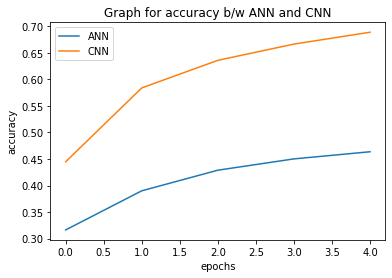

In [34]:
plt.plot(np.arange(len(accur_ann)), accur_ann)
plt.plot(np.arange(len(accur_cnn)), accur_cnn)

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Graph for accuracy b/w ANN and CNN")
plt.legend(["ANN","CNN"])

### 2. Classification Report

Classification report is a better tool to understand the performace of both the models. This will show precision, recal and f1 score of ANN and CNN.

In [74]:
print("Classification report of ANN")
print(classification_report(prediction_ann, Y_test.ravel()))

print("Classification report of CNN")
print(classification_report(prediction_cnn, Y_test.ravel()))

Classification report of ANN
              precision    recall  f1-score   support

           0       0.55      0.50      0.52      1098
           1       0.60      0.58      0.59      1041
           2       0.30      0.32      0.31       947
           3       0.33      0.35      0.34       961
           4       0.28      0.46      0.35       610
           5       0.27      0.42      0.33       650
           6       0.56      0.47      0.51      1208
           7       0.53      0.51      0.52      1028
           8       0.72      0.47      0.57      1538
           9       0.45      0.49      0.47       919

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.49      0.46      0.47     10000

Classification report of CNN
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       974
           1       0.78      0.80      0.79       983
           2       0

### 3. Histogram to compare f1 scores of both model

Checking the f1 score is very important when it comes to the classification model. So here I have ploted a histogram which compare the

In [43]:
from sklearn.metrics import f1_score

f1_score_ann = f1_score(prediction_ann, Y_test.ravel(), average=None)
f1_score_cnn = f1_score(prediction_cnn, Y_test.ravel(), average=None)

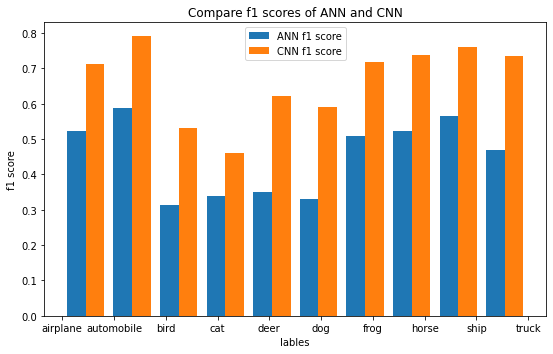

In [72]:
plt.figure(figsize=(9, 5.4))
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.hist([labels,labels], weights=[f1_score_ann, f1_score_cnn], label=["ANN f1 score", "CNN f1 score"])
plt.xlabel("lables")
plt.ylabel("f1 score")
plt.title("Compare f1 scores of ANN and CNN")
plt.legend()
